Install ucimlrepo package<br>
Package to easily import datasets from the UC Irvine Machine Learning Repository into scripts and notebooks.<br>
Install all the needed packages.

In [2]:
!pip3 install -U ucimlrepo
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install -U -q segmentation-models
!pip3 install -q tensorflow
!pip3 install -q keras
!pip3 install np_utils
!pip3 install scikeras
!pip3 install livelossplot


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Restart Kernel <br>
Import all Necessary Libraries

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Basic
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import livelossplot

#General Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV


#Deep Learning
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


fetch_ucirepo
Loads a dataset from the UCI ML Repository, including the dataframes and metadata information.

In [2]:
diabetes_features_data = pd.DataFrame()
diabetes_targets_data = pd.DataFrame()

In [7]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data

diabetes_features_data = pd.DataFrame.from_dict(diabetes_130_us_hospitals_for_years_1999_2008.data.features)
diabetes_targets_data = pd.DataFrame.from_dict(diabetes_130_us_hospitals_for_years_1999_2008.data.targets)

# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata.uci_id)
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata.num_instances)
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata.additional_info.summary)

# access variable info in tabular format
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

296
101766
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalizati

c:\Users\judav\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Problems importing the dataset, you can import it manually from the current directory.

In [3]:
# Read the CSV file
diabetes_data = pd.read_csv("../PruebaTecnica/diabetic_data.csv")
diabetes_data = diabetes_data.replace('?', np.nan)
idColumn = diabetes_data["patient_nbr"]
if diabetes_features_data.empty:
    diabetes_features_data = diabetes_data.drop(columns=['readmitted'])
    if not 'patient_nbr' in diabetes_features_data.columns: 
        diabetes_features_data = pd.concat([diabetes_features_data , idColumn], axis = 1)  
if diabetes_targets_data.empty:
    diabetes_targets_data = diabetes_data[['readmitted']]

General Dataset info

In [4]:
if not 'patient_nbr' in diabetes_features_data.columns: 
        diabetes_features_data = pd.concat([diabetes_features_data , idColumn], axis = 1)
diabetes_data = pd.concat([diabetes_features_data , diabetes_targets_data], axis = 1)
diabetes_data.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Remove Features with less than 10k non-null values, too many information missing.

In [5]:
diabetes_data_copy = diabetes_data.drop(columns=['weight', 'max_glu_serum'])
len(diabetes_data_copy.columns)

48

Process nan or null values:<br>
Replace np.nan to >0 been a new category.<br>
Removing nan rows realted with diag_1, diag_2, diag_3<br>
And replace all null values from categorical feature to Other giving a new option in them.<br>

In [6]:
#Changing null values from A1Cresult to >0
diabetes_data_copy['A1Cresult'] = diabetes_data_copy['A1Cresult'].replace(np.nan,'>0')
#Removing all null rows from diag_1, diag_2 and diag_3
diabetes_data_copy = diabetes_data_copy[diabetes_data_copy['diag_1'].notna()]
diabetes_data_copy = diabetes_data_copy[diabetes_data_copy['diag_2'].notna()]
diabetes_data_copy = diabetes_data_copy[diabetes_data_copy['diag_3'].notna()]
#Changing all the null values in race, payer_code, medical_specialty
diabetes_data_copy = diabetes_data_copy.fillna({"race": "Other", "payer_code": "Other", "medical_specialty":"Other"})


In [7]:
#General info after cleaning null values
diabetes_data_copy.info(verbose=True, max_cols=None)
diabetes_data_copy.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 100244 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100244 non-null  int64 
 1   patient_nbr               100244 non-null  int64 
 2   race                      100244 non-null  object
 3   gender                    100244 non-null  object
 4   age                       100244 non-null  object
 5   admission_type_id         100244 non-null  int64 
 6   discharge_disposition_id  100244 non-null  int64 
 7   admission_source_id       100244 non-null  int64 
 8   time_in_hospital          100244 non-null  int64 
 9   payer_code                100244 non-null  object
 10  medical_specialty         100244 non-null  object
 11  num_lab_procedures        100244 non-null  int64 
 12  num_procedures            100244 non-null  int64 
 13  num_medications           100244 non-null  int64 
 14  number_ou

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.002440e+05,1.002440e+05,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000,100244.000000
mean,1.660172e+08,5.462971e+07,2.022754,3.729281,5.760604,4.420275,43.173716,1.350275,16.117823,0.372561,0.199014,0.639470,7.497007
std,1.026756e+08,3.869452e+07,1.444914,5.281027,4.063089,2.991273,19.691484,1.710913,8.116424,1.274074,0.933541,1.262773,1.839537
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,8.556777e+07,2.346104e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.530494e+08,4.604908e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.310625e+08,8.778530e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Drop Duplicates using patient_nbr as ID:

In [8]:
diabetes_data_copy = diabetes_data_copy.drop_duplicates(subset=['patient_nbr'])
diabetes_data_copy.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              70416 non-null  int64 
 1   patient_nbr               70416 non-null  int64 
 2   race                      70416 non-null  object
 3   gender                    70416 non-null  object
 4   age                       70416 non-null  object
 5   admission_type_id         70416 non-null  int64 
 6   discharge_disposition_id  70416 non-null  int64 
 7   admission_source_id       70416 non-null  int64 
 8   time_in_hospital          70416 non-null  int64 
 9   payer_code                70416 non-null  object
 10  medical_specialty         70416 non-null  object
 11  num_lab_procedures        70416 non-null  int64 
 12  num_procedures            70416 non-null  int64 
 13  num_medications           70416 non-null  int64 
 14  number_outpatient         

Remove race feature, there is not positive to keep racial characteristics on a dataset:

In [9]:
#Remove Race 
if 'race' in diabetes_data_copy.columns:
    diabetes_data_copy = diabetes_data_copy.drop(columns=['race'])
diabetes_data_copy.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              70416 non-null  int64 
 1   patient_nbr               70416 non-null  int64 
 2   gender                    70416 non-null  object
 3   age                       70416 non-null  object
 4   admission_type_id         70416 non-null  int64 
 5   discharge_disposition_id  70416 non-null  int64 
 6   admission_source_id       70416 non-null  int64 
 7   time_in_hospital          70416 non-null  int64 
 8   payer_code                70416 non-null  object
 9   medical_specialty         70416 non-null  object
 10  num_lab_procedures        70416 non-null  int64 
 11  num_procedures            70416 non-null  int64 
 12  num_medications           70416 non-null  int64 
 13  number_outpatient         70416 non-null  int64 
 14  number_emergency          

Remove unused features (ID features no repercusion on the final model):

In [10]:
if 'encounter_id' in diabetes_data_copy.columns:
    diabetes_data_copy = diabetes_data_copy.drop(columns=['encounter_id'])
if 'patient_nbr'  in diabetes_data_copy.columns:
    diabetes_data_copy = diabetes_data_copy.drop(columns=['patient_nbr'])
diabetes_data_copy.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    70416 non-null  object
 1   age                       70416 non-null  object
 2   admission_type_id         70416 non-null  int64 
 3   discharge_disposition_id  70416 non-null  int64 
 4   admission_source_id       70416 non-null  int64 
 5   time_in_hospital          70416 non-null  int64 
 6   payer_code                70416 non-null  object
 7   medical_specialty         70416 non-null  object
 8   num_lab_procedures        70416 non-null  int64 
 9   num_procedures            70416 non-null  int64 
 10  num_medications           70416 non-null  int64 
 11  number_outpatient         70416 non-null  int64 
 12  number_emergency          70416 non-null  int64 
 13  number_inpatient          70416 non-null  int64 
 14  diag_1                    

Change Gender, change and diabetesMed to numerical bynary values depends on the case:

In [11]:
columnsToChange = ["gender", "change", "diabetesMed"]
dict = {"gender1": "Female", "gender2": "Male", "change1": "Ch", "change2": "No", "diabetesMed1": "Yes", "diabetesMed2": "No"}
#After Handling null or nan values
diabetes_data_copy2 = diabetes_data_copy
for x in columnsToChange:
    mapping = {}   
    if x is "gender":
        mapping = {diabetes_data_copy2[x].unique()[0]: 1, diabetes_data_copy2[x].unique()[1]: 0, diabetes_data_copy2[x].unique()[2]: -1}
    else:
        mapping = {diabetes_data_copy2[x].unique()[0]: 1, diabetes_data_copy2[x].unique()[1]: 0}
    #diabetes_data_copy2[x][1]
    if diabetes_data_copy2[x][1] is dict[x+"1"] or dict[x+"2"]:
        diabetes_data_copy2[x] = diabetes_data_copy2[x].map(mapping)
    #diabetes_data_copy2[x][1]


diabetes_data_copy2.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    70416 non-null  int64 
 1   age                       70416 non-null  object
 2   admission_type_id         70416 non-null  int64 
 3   discharge_disposition_id  70416 non-null  int64 
 4   admission_source_id       70416 non-null  int64 
 5   time_in_hospital          70416 non-null  int64 
 6   payer_code                70416 non-null  object
 7   medical_specialty         70416 non-null  object
 8   num_lab_procedures        70416 non-null  int64 
 9   num_procedures            70416 non-null  int64 
 10  num_medications           70416 non-null  int64 
 11  number_outpatient         70416 non-null  int64 
 12  number_emergency          70416 non-null  int64 
 13  number_inpatient          70416 non-null  int64 
 14  diag_1                    

<>:7: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\judav\AppData\Local\Temp\ipykernel_9140\2370233910.py:7: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if x is "gender":


Change age, medical_specialty, prayer_code and A1Cresult taking unique values with one hot encoding, only be 1 if the current value apply to the row:

In [12]:
#Columns to apply dummies
columnsTochange = ["age", "medical_specialty", "payer_code", "A1Cresult"]


for x in columnsTochange:

    #Print column unique values
    #diabetes_data_copy2[x].unique()
    
    # get the dummies and store it in a variable
    dummies  = pd.get_dummies(diabetes_data_copy2[x], dtype='int64')

    # Concatenate the dummies to original dataframe
    if x in diabetes_data_copy2.columns:
        diabetes_data_copy2 = pd.concat([diabetes_data_copy2, dummies], axis='columns')
        diabetes_data_copy2 = diabetes_data_copy2.drop([x], axis='columns')
diabetes_data_copy2.head(5)
diabetes_data_copy2.info(verbose=True, max_cols=None)

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Other,PO,SI,SP,UN,WC,>0,>7,>8,Norm
1,1,1,1,7,3,59,0,18,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,1,1,7,2,11,5,13,2,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,1,7,2,44,1,16,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,1,1,7,1,51,0,8,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0,2,1,2,3,31,6,16,0,0,...,1,0,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 144 columns):
 #    Column                                Dtype 
---   ------                                ----- 
 0    gender                                int64 
 1    admission_type_id                     int64 
 2    discharge_disposition_id              int64 
 3    admission_source_id                   int64 
 4    time_in_hospital                      int64 
 5    num_lab_procedures                    int64 
 6    num_procedures                        int64 
 7    num_medications                       int64 
 8    number_outpatient                     int64 
 9    number_emergency                      int64 
 10   number_inpatient                      int64 
 11   diag_1                                object
 12   diag_2                                object
 13   diag_3                                object
 14   number_diagnoses                      int64 
 15   metformin            

Diag Features Fix
Diag features indicate the diagnoses of the cause of the patien's health problem.

- diag_1: First diagnose
- diag_2: Second diagnose
- diag_3: Third diagnose

They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes), resulting in hundreds of distinct categories. One way to simplify this, is by grouping every ICD-9 code value into one of 18 generic health problems, depending on the first 3 digits as following:

- List of ICD-9 codes 001–139: infectious and parasitic diseases
- List of ICD-9 codes 140–239: neoplasms
- List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
- List of ICD-9 codes 290–319: mental disorders
- List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
- List of ICD-9 codes 390–459: diseases of the circulatory system
- List of ICD-9 codes 460–519: diseases of the respiratory system
- List of ICD-9 codes 520–579: diseases of the digestive system
- List of ICD-9 codes 580–629: diseases of the genitourinary system
- List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
- List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
- List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
- List of ICD-9 codes 740–759: congenital anomalies
- List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
- List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
- List of ICD-9 codes 800–999: injury and poisoning
 -List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

In [13]:
#start by setting all values containing E or V into 0 (as one category)
diabetes_data_copy2.loc[diabetes_data_copy2['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
diabetes_data_copy2.loc[diabetes_data_copy2['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
diabetes_data_copy2.loc[diabetes_data_copy2['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
diabetes_data_copy2.loc[diabetes_data_copy2['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
diabetes_data_copy2.loc[diabetes_data_copy2['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
diabetes_data_copy2.loc[diabetes_data_copy2['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#Diag values can be converted into numeric values
diabetes_data_copy2['diag_1'] = diabetes_data_copy2['diag_1'].astype(float)
diabetes_data_copy2['diag_2'] = diabetes_data_copy2['diag_2'].astype(float)
diabetes_data_copy2['diag_3'] = diabetes_data_copy2['diag_3'].astype(float)

In [14]:
#Now we will reduce the number of categories in diag features according to ICD-9 code (diag_1)
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=1) & (diabetes_data_copy2['diag_1']< 140),['diag_1']] = 1
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=140) & (diabetes_data_copy2['diag_1']< 240),['diag_1']] = 2
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=240) & (diabetes_data_copy2['diag_1']< 280),['diag_1']] = 3
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=280) & (diabetes_data_copy2['diag_1']< 290),['diag_1']] = 4
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=290) & (diabetes_data_copy2['diag_1']< 320),['diag_1']] = 5
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=320) & (diabetes_data_copy2['diag_1']< 390),['diag_1']] = 6
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=390) & (diabetes_data_copy2['diag_1']< 460),['diag_1']] = 7
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=460) & (diabetes_data_copy2['diag_1']< 520),['diag_1']] = 8
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=520) & (diabetes_data_copy2['diag_1']< 580),['diag_1']] = 9
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=580) & (diabetes_data_copy2['diag_1']< 630),['diag_1']] = 10
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=630) & (diabetes_data_copy2['diag_1']< 680),['diag_1']] = 11
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=680) & (diabetes_data_copy2['diag_1']< 710),['diag_1']] = 12
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=710) & (diabetes_data_copy2['diag_1']< 740),['diag_1']] = 13
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=740) & (diabetes_data_copy2['diag_1']< 760),['diag_1']] = 14
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=760) & (diabetes_data_copy2['diag_1']< 780),['diag_1']] = 15
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=780) & (diabetes_data_copy2['diag_1']< 800),['diag_1']] = 16
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_1']>=800) & (diabetes_data_copy2['diag_1']< 1000),['diag_1']] = 17

In [15]:
#Now we will reduce the number of categories in diag features according to ICD-9 code (diag_2)
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=1) & (diabetes_data_copy2['diag_2']< 140),['diag_2']] = 1
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=140) & (diabetes_data_copy2['diag_2']< 240),['diag_2']] = 2
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=240) & (diabetes_data_copy2['diag_2']< 280),['diag_2']] = 3
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=280) & (diabetes_data_copy2['diag_2']< 290),['diag_2']] = 4
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=290) & (diabetes_data_copy2['diag_2']< 320),['diag_2']] = 5
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=320) & (diabetes_data_copy2['diag_2']< 390),['diag_2']] = 6
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=390) & (diabetes_data_copy2['diag_2']< 460),['diag_2']] = 7
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=460) & (diabetes_data_copy2['diag_2']< 520),['diag_2']] = 8
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=520) & (diabetes_data_copy2['diag_2']< 580),['diag_2']] = 9
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=580) & (diabetes_data_copy2['diag_2']< 630),['diag_2']] = 10
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=630) & (diabetes_data_copy2['diag_2']< 680),['diag_2']] = 11
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=680) & (diabetes_data_copy2['diag_2']< 710),['diag_2']] = 12
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=710) & (diabetes_data_copy2['diag_2']< 740),['diag_2']] = 13
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=740) & (diabetes_data_copy2['diag_2']< 760),['diag_2']] = 14
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=760) & (diabetes_data_copy2['diag_2']< 780),['diag_2']] = 15
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=780) & (diabetes_data_copy2['diag_2']< 800),['diag_2']] = 16
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_2']>=800) & (diabetes_data_copy2['diag_2']< 1000),['diag_2']] = 17

In [16]:
#Now we will reduce the number of categories in diag features according to ICD-9 code (diag_2)
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=1) & (diabetes_data_copy2['diag_3']< 140),['diag_3']] = 1
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=140) & (diabetes_data_copy2['diag_3']< 240),['diag_3']] = 2
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=240) & (diabetes_data_copy2['diag_3']< 280),['diag_3']] = 3
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=280) & (diabetes_data_copy2['diag_3']< 290),['diag_3']] = 4
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=290) & (diabetes_data_copy2['diag_3']< 320),['diag_3']] = 5
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=320) & (diabetes_data_copy2['diag_3']< 390),['diag_3']] = 6
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=390) & (diabetes_data_copy2['diag_3']< 460),['diag_3']] = 7
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=460) & (diabetes_data_copy2['diag_3']< 520),['diag_3']] = 8
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=520) & (diabetes_data_copy2['diag_3']< 580),['diag_3']] = 9
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=580) & (diabetes_data_copy2['diag_3']< 630),['diag_3']] = 10
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=630) & (diabetes_data_copy2['diag_3']< 680),['diag_3']] = 11
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=680) & (diabetes_data_copy2['diag_3']< 710),['diag_3']] = 12
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=710) & (diabetes_data_copy2['diag_3']< 740),['diag_3']] = 13
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=740) & (diabetes_data_copy2['diag_3']< 760),['diag_3']] = 14
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=760) & (diabetes_data_copy2['diag_3']< 780),['diag_3']] = 15
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=780) & (diabetes_data_copy2['diag_3']< 800),['diag_3']] = 16
diabetes_data_copy2.loc[(diabetes_data_copy2['diag_3']>=800) & (diabetes_data_copy2['diag_3']< 1000),['diag_3']] = 17

In [17]:
diabetes_data_copy2.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 144 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    gender                                int64  
 1    admission_type_id                     int64  
 2    discharge_disposition_id              int64  
 3    admission_source_id                   int64  
 4    time_in_hospital                      int64  
 5    num_lab_procedures                    int64  
 6    num_procedures                        int64  
 7    num_medications                       int64  
 8    number_outpatient                     int64  
 9    number_emergency                      int64  
 10   number_inpatient                      int64  
 11   diag_1                                float64
 12   diag_2                                float64
 13   diag_3                                float64
 14   number_diagnoses                      int64  
 15   metf

Changing all the drug features to numerical matching each categorical value to a number:

In [18]:
columnsToChange = ["metformin", "repaglinide", "nateglinide", "chlorpropamide","glimepiride",
                   "acetohexamide","glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone",
                   "acarbose","miglitol","troglitazone","tolazamide","examide","citoglipton",
                   "insulin","glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
                   "metformin-rosiglitazone","metformin-pioglitazone"]
valuesMapping = {"No": 0, "Steady": 1, "Up": 2, "Down":3}

for x in columnsToChange:
    if isinstance(diabetes_data_copy2[x][1], str):
        diabetes_data_copy2[x] = diabetes_data_copy2[x].map(valuesMapping)
    


diabetes_data_copy2.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 144 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    gender                                int64  
 1    admission_type_id                     int64  
 2    discharge_disposition_id              int64  
 3    admission_source_id                   int64  
 4    time_in_hospital                      int64  
 5    num_lab_procedures                    int64  
 6    num_procedures                        int64  
 7    num_medications                       int64  
 8    number_outpatient                     int64  
 9    number_emergency                      int64  
 10   number_inpatient                      int64  
 11   diag_1                                float64
 12   diag_2                                float64
 13   diag_3                                float64
 14   number_diagnoses                      int64  
 15   metf

Select the mapping change (Machine Learning) or using LabelEncoder (Deep Learning) <br>
Change target to numerical values:<br>

In [19]:
print(diabetes_data_copy2["readmitted"].unique())
valuesMapping = {"NO": 1, "<30": 2, ">30": 3}

if isinstance(diabetes_data_copy2["readmitted"][1], str):
    diabetes_data_copy2["readmitted"] = diabetes_data_copy2["readmitted"].map(valuesMapping)

print(diabetes_data_copy2["readmitted"].unique())
print(diabetes_data_copy2.info(verbose=True, max_cols=None))

['>30' 'NO' '<30']
[3 1 2]
<class 'pandas.core.frame.DataFrame'>
Index: 70416 entries, 1 to 101765
Data columns (total 144 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    gender                                int64  
 1    admission_type_id                     int64  
 2    discharge_disposition_id              int64  
 3    admission_source_id                   int64  
 4    time_in_hospital                      int64  
 5    num_lab_procedures                    int64  
 6    num_procedures                        int64  
 7    num_medications                       int64  
 8    number_outpatient                     int64  
 9    number_emergency                      int64  
 10   number_inpatient                      int64  
 11   diag_1                                float64
 12   diag_2                                float64
 13   diag_3                                float64
 14   number_diagnoses             

Encode the target to numerical values:

In [20]:
encoder = LabelEncoder()
if isinstance(diabetes_data_copy2["readmitted"][1], str):
    encoder.fit(diabetes_data_copy2["readmitted"])
    diabetes_data_copy2["readmitted"] = encoder.transform(diabetes_data_copy2["readmitted"])

LabelEncoder()

In [56]:
print(diabetes_data_copy2["readmitted"].unique())

[3 1 2]


See the correlation between the features and the target.
Diplay the total count negative correlation on the dataset.

In [20]:
correlationWithTarget = diabetes_data_copy2[diabetes_data_copy2.columns[1:]].corr()['readmitted'][:]
correlationWithTarget[1:20]
len(correlationWithTarget)
(correlationWithTarget < 0).sum().sum()

discharge_disposition_id   -0.028724
admission_source_id         0.045685
time_in_hospital            0.044693
num_lab_procedures          0.038819
num_procedures             -0.032296
num_medications             0.022595
number_outpatient           0.065121
number_emergency            0.072629
number_inpatient            0.120174
diag_1                     -0.013341
diag_2                     -0.002760
diag_3                      0.014807
number_diagnoses            0.089433
metformin                  -0.014025
repaglinide                 0.015107
nateglinide                 0.005796
chlorpropamide              0.004680
glimepiride                 0.005979
acetohexamide               0.005320
Name: readmitted, dtype: float64

145

78

Related to graphics remove all print and change it to only display the latest value.

In [21]:
InteractiveShell.ast_node_interactivity = "last_expr"

Showing a countplot of each feature againts the target (Count of each spcific value from the target)<br>
Summary of which fetaure values have more repercusion on the values of the target.<br>

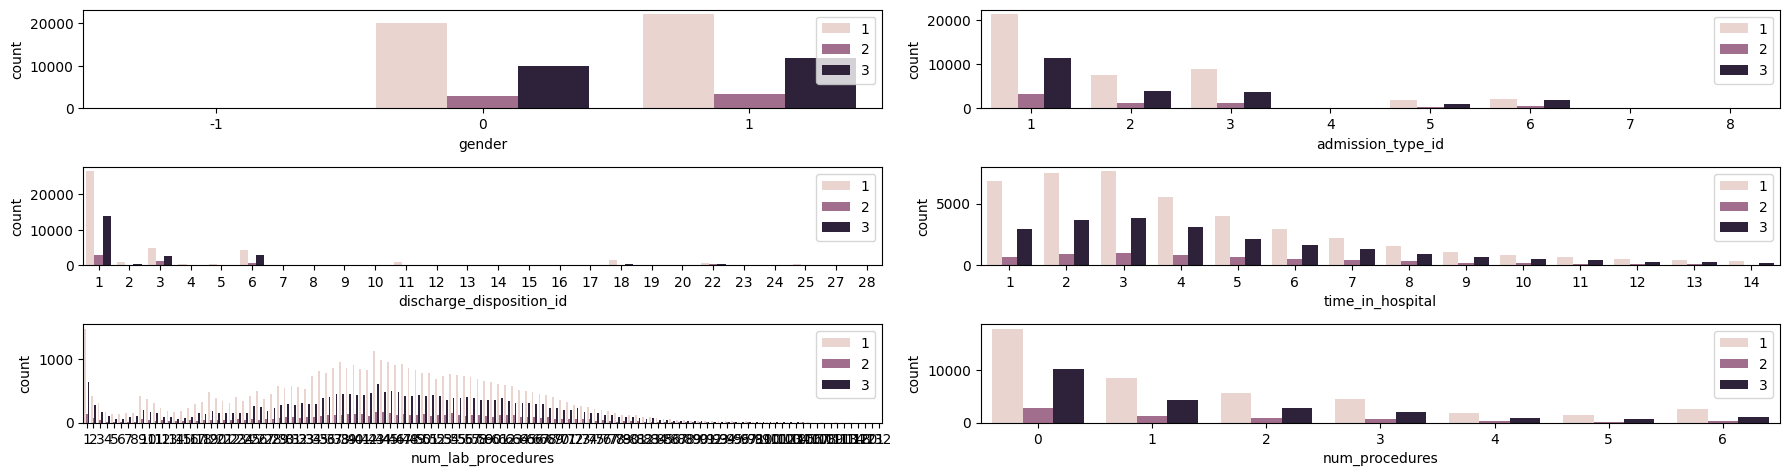

In [22]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)



sns.countplot(data=diabetes_data_copy2, x='gender', hue='readmitted', ax=ax1)
sns.countplot(data=diabetes_data_copy2, x='admission_type_id', hue='readmitted', ax=ax2)
sns.countplot(data=diabetes_data_copy2, x='discharge_disposition_id', hue='readmitted', ax=ax3)
sns.countplot(data=diabetes_data_copy2, x='time_in_hospital', hue='readmitted', ax=ax4)
sns.countplot(data=diabetes_data_copy2, x='num_lab_procedures', hue='readmitted', ax=ax5)
sns.countplot(data=diabetes_data_copy2, x='num_procedures', hue='readmitted', ax=ax6)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
ax5.legend(loc='upper right')
ax6.legend(loc='upper right')

plt.tight_layout()
plt.show()
# readmitted: 0 = No, 1 = >30, 2 = <30

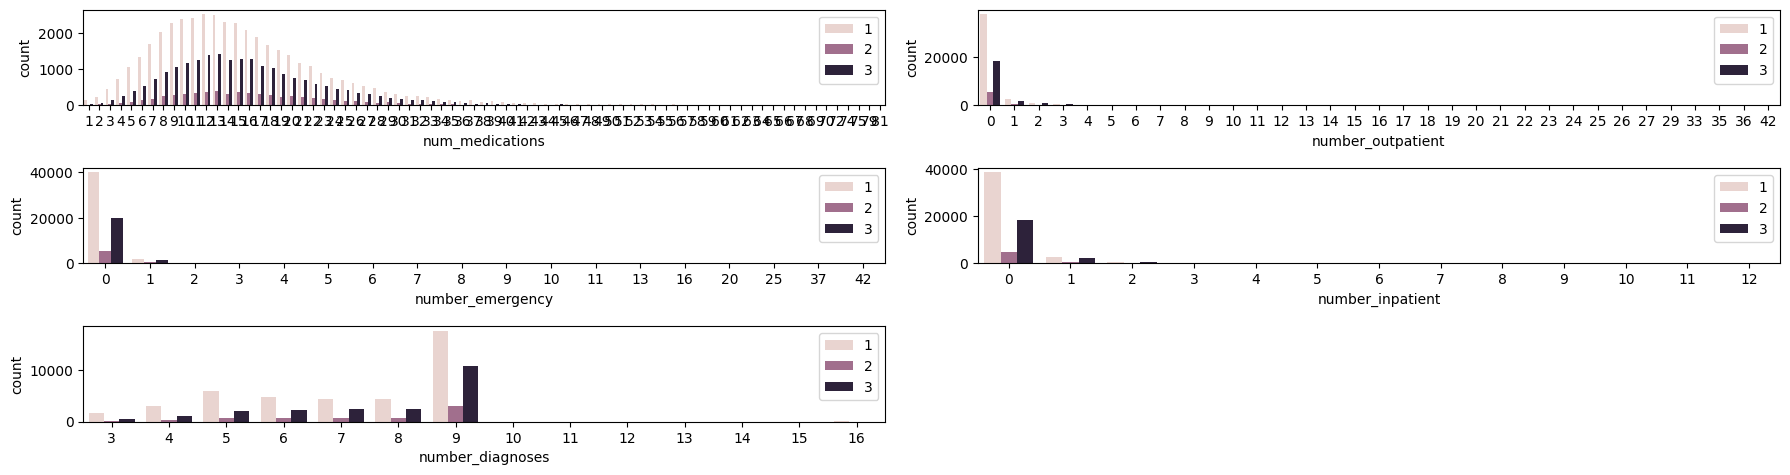

In [23]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)

sns.countplot(data=diabetes_data_copy2, x='num_medications', hue='readmitted', ax=ax1)
sns.countplot(data=diabetes_data_copy2, x='number_outpatient', hue='readmitted', ax=ax2)
sns.countplot(data=diabetes_data_copy2, x='number_emergency', hue='readmitted', ax=ax3)
sns.countplot(data=diabetes_data_copy2, x='number_inpatient', hue='readmitted', ax=ax4)
sns.countplot(data=diabetes_data_copy2, x='number_diagnoses', hue='readmitted', ax=ax5)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
ax5.legend(loc='upper right')

plt.tight_layout()
plt.show()

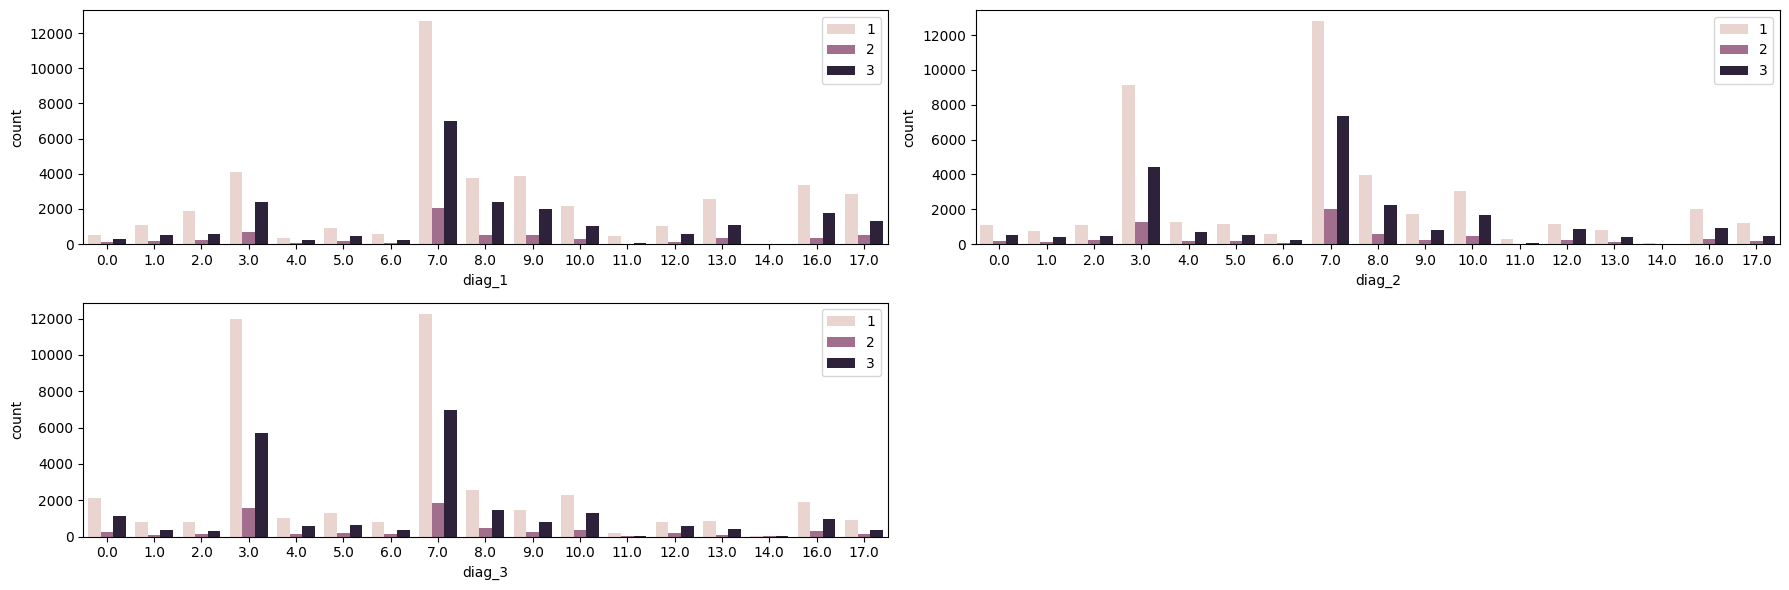

In [24]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

sns.countplot(data=diabetes_data_copy2, x='diag_1', hue='readmitted', ax=ax1)
sns.countplot(data=diabetes_data_copy2, x='diag_2', hue='readmitted', ax=ax2)
sns.countplot(data=diabetes_data_copy2, x='diag_3', hue='readmitted', ax=ax3)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

Distribution of drug features in the dataset through and histplot.

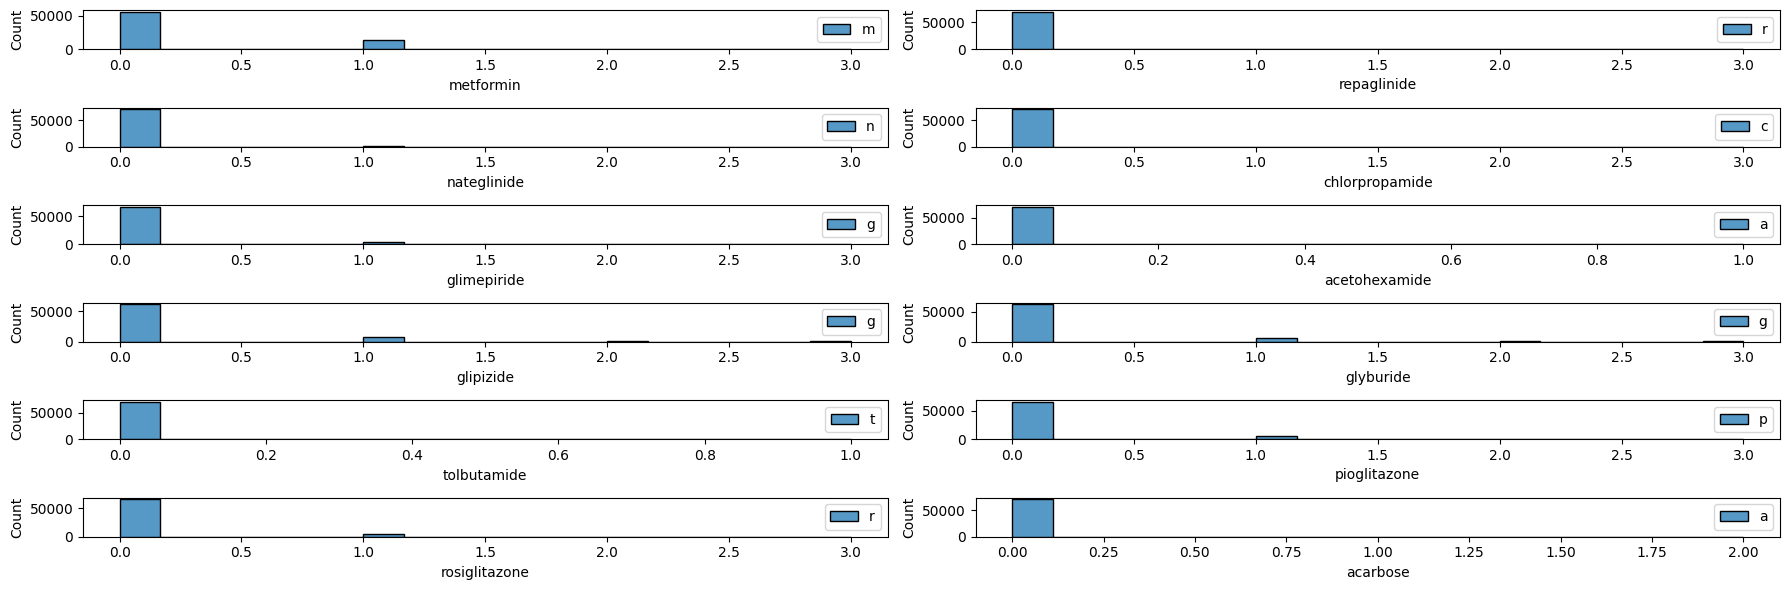

In [25]:

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(6, 2, 1)
ax2 = fig.add_subplot(6, 2, 2)
ax3 = fig.add_subplot(6, 2, 3)
ax4 = fig.add_subplot(6, 2, 4)
ax5 = fig.add_subplot(6, 2, 5)
ax6 = fig.add_subplot(6, 2, 6)
ax7 = fig.add_subplot(6, 2, 7)
ax8 = fig.add_subplot(6, 2, 8)
ax9 = fig.add_subplot(6, 2, 9)
ax10 = fig.add_subplot(6, 2, 10)
ax11 = fig.add_subplot(6, 2, 11)
ax12 = fig.add_subplot(6, 2, 12)


sns.histplot(diabetes_data_copy2, x="metformin", ax=ax1)
sns.histplot(diabetes_data_copy2, x="repaglinide", ax=ax2)
sns.histplot(diabetes_data_copy2, x="nateglinide", ax=ax3)
sns.histplot(diabetes_data_copy2, x="chlorpropamide", ax=ax4)
sns.histplot(diabetes_data_copy2, x="glimepiride", ax=ax5)
sns.histplot(diabetes_data_copy2, x="acetohexamide", ax=ax6)
sns.histplot(diabetes_data_copy2, x="glipizide", ax=ax7)
sns.histplot(diabetes_data_copy2, x="glyburide", ax=ax8)
sns.histplot(diabetes_data_copy2, x="tolbutamide", ax=ax9)
sns.histplot(diabetes_data_copy2, x="pioglitazone", ax=ax10)
sns.histplot(diabetes_data_copy2, x="rosiglitazone", ax=ax11)
sns.histplot(diabetes_data_copy2, x="acarbose", ax=ax12)


ax1.legend('metformin',loc='upper right')
ax2.legend('repaglinide',loc='upper right')
ax3.legend('nateglinide',loc='upper right')
ax4.legend('chlorpropamide',loc='upper right')
ax5.legend('glimepiride',loc='upper right')
ax6.legend('acetohexamide',loc='upper right')
ax7.legend('glipizide',loc='upper right')
ax8.legend('glyburide',loc='upper right')
ax9.legend('tolbutamide',loc='upper right')
ax10.legend('pioglitazone',loc='upper right')
ax11.legend('rosiglitazone',loc='upper right')
ax12.legend('acarbose',loc='upper right')


plt.tight_layout()
plt.show()



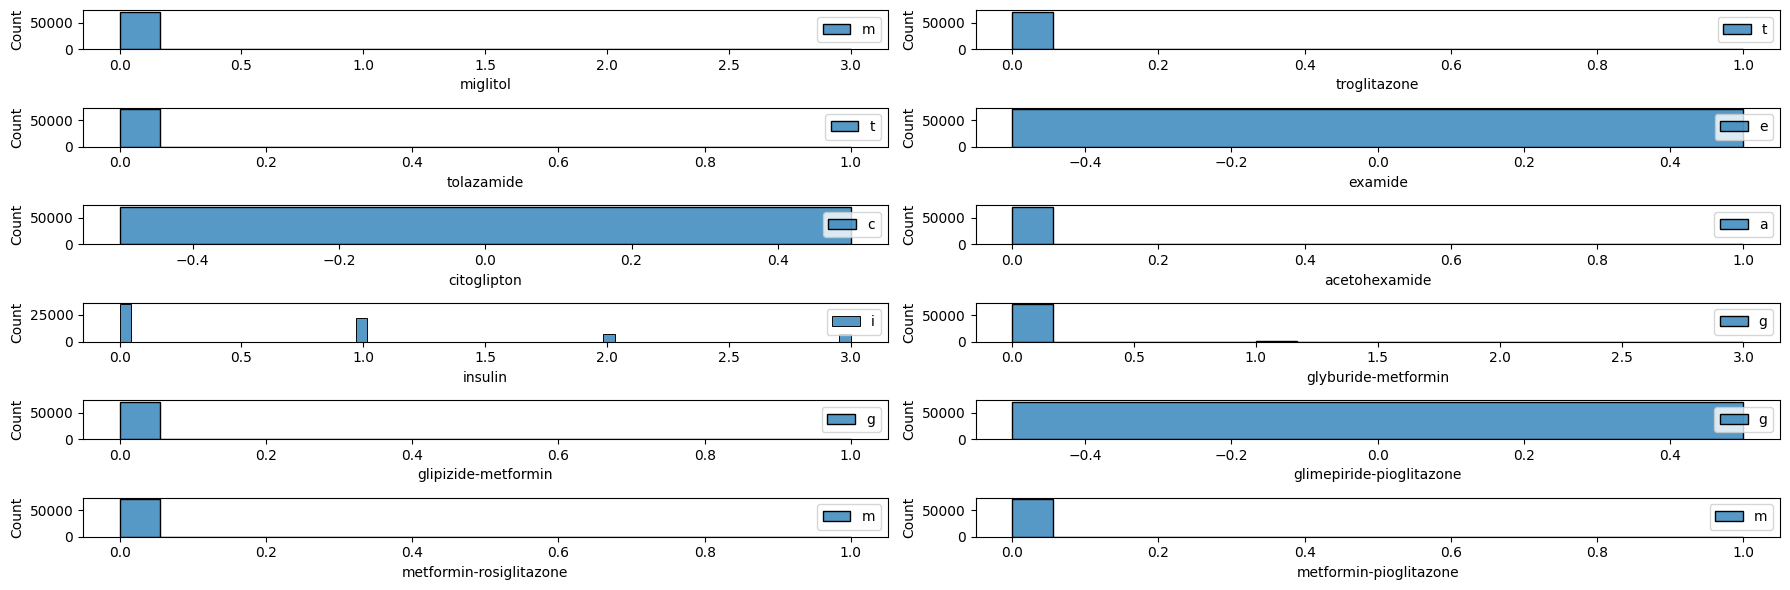

In [26]:
InteractiveShell.ast_node_interactivity = "last_expr"
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(6, 2, 1)
ax2 = fig.add_subplot(6, 2, 2)
ax3 = fig.add_subplot(6, 2, 3)
ax4 = fig.add_subplot(6, 2, 4)
ax5 = fig.add_subplot(6, 2, 5)
ax6 = fig.add_subplot(6, 2, 6)
ax7 = fig.add_subplot(6, 2, 7)
ax8 = fig.add_subplot(6, 2, 8)
ax9 = fig.add_subplot(6, 2, 9)
ax10 = fig.add_subplot(6, 2, 10)
ax11 = fig.add_subplot(6, 2, 11)
ax12 = fig.add_subplot(6, 2, 12)


sns.histplot(diabetes_data_copy2, x="miglitol", ax=ax1)
sns.histplot(diabetes_data_copy2, x="troglitazone", ax=ax2)
sns.histplot(diabetes_data_copy2, x="tolazamide", ax=ax3)
sns.histplot(diabetes_data_copy2, x="examide", ax=ax4)
sns.histplot(diabetes_data_copy2, x="citoglipton", ax=ax5)
sns.histplot(diabetes_data_copy2, x="acetohexamide", ax=ax6)
sns.histplot(diabetes_data_copy2, x="insulin", ax=ax7)
sns.histplot(diabetes_data_copy2, x="glyburide-metformin", ax=ax8)
sns.histplot(diabetes_data_copy2, x="glipizide-metformin", ax=ax9)
sns.histplot(diabetes_data_copy2, x="glimepiride-pioglitazone", ax=ax10)
sns.histplot(diabetes_data_copy2, x="metformin-rosiglitazone", ax=ax11)
sns.histplot(diabetes_data_copy2, x="metformin-pioglitazone", ax=ax12)


ax1.legend('miglitol',loc='upper right')
ax2.legend('troglitazone',loc='upper right')
ax3.legend('tolazamide',loc='upper right')
ax4.legend('examide',loc='upper right')
ax5.legend('citoglipton',loc='upper right')
ax6.legend('acetohexamide',loc='upper right')
ax7.legend('insulin',loc='upper right')
ax8.legend('glyburide-metformin',loc='upper right')
ax9.legend('glipizide-metformin',loc='upper right')
ax10.legend('glimepiride-pioglitazone',loc='upper right')
ax11.legend('metformin-rosiglitazone',loc='upper right')
ax12.legend('metformin-pioglitazone',loc='upper right')


plt.tight_layout()
plt.show()

Covariance Between Features, removing target.

In [27]:
covarianceMatrix = diabetes_data_copy2.drop(["readmitted"], axis='columns').cov()
covarianceMatrix

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Other,PO,SI,SP,UN,WC,>0,>7,>8,Norm
gender,0.249050,-0.008952,0.051480,-0.005146,0.035383,-0.054843,-0.059195,0.046045,0.008141,0.004982,...,-0.000591,-0.000231,6.873506e-05,-0.002724,-0.001120,-0.000357,0.004333,-0.000830,-0.003690,0.000188
admission_type_id,-0.008952,2.272518,0.674477,0.767317,-0.077678,-3.492862,0.353786,1.198287,0.061218,-0.014003,...,0.155256,-0.002266,1.085342e-03,-0.007409,-0.007951,0.000096,0.036411,-0.007542,-0.010048,-0.018821
discharge_disposition_id,0.051480,0.674477,27.785738,0.105525,2.558868,2.896118,0.189986,4.983110,-0.097324,-0.074032,...,0.382331,-0.005819,-1.034780e-03,-0.046785,-0.032420,-0.000435,0.035547,-0.006704,-0.019097,-0.009746
admission_source_id,-0.005146,0.767317,0.105525,17.338129,0.080455,7.360682,-0.939263,-2.047228,0.079170,0.118856,...,0.309148,-0.006433,1.081530e-03,-0.023435,-0.026706,-0.002980,-0.023561,-0.001277,0.022529,0.002309
time_in_hospital,0.035383,-0.077678,2.558868,0.080455,8.743437,19.537255,0.970107,11.462757,-0.053266,-0.015602,...,0.086897,-0.003470,-3.891187e-04,-0.016007,-0.006582,-0.000934,-0.087060,0.020126,0.037293,0.029641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WC,-0.000357,0.000096,-0.000435,-0.002980,-0.000934,-0.016883,0.000636,0.000443,0.000014,-0.000068,...,-0.000693,-0.000010,-8.204354e-07,-0.000075,-0.000041,0.001602,0.000075,-0.000009,-0.000052,-0.000014
>0,0.004333,0.036411,0.035547,-0.023561,-0.087060,-2.063875,0.014826,-0.087846,0.011916,0.001030,...,0.002637,0.000346,-3.608464e-05,-0.001810,-0.002231,0.000075,0.147230,-0.033446,-0.070107,-0.043677
>7,-0.000830,-0.007542,-0.006704,-0.001277,0.020126,0.416139,-0.002835,0.031762,-0.001122,-0.001448,...,-0.002146,-0.000237,-6.636088e-06,0.000181,0.000741,-0.000009,-0.033446,0.039097,-0.003482,-0.002169
>8,-0.003690,-0.010048,-0.019097,0.022529,0.037293,1.054112,-0.006076,0.031440,-0.005003,0.000670,...,0.002948,-0.000386,4.153001e-05,0.002041,0.001438,-0.000052,-0.070107,-0.003482,0.078137,-0.004547


After graphics comeback to display all the information on the cell

In [28]:
InteractiveShell.ast_node_interactivity = "all"

Drop any drug feature with only one unique value.

In [29]:
diabetes_data_copy2 = diabetes_data_copy2.drop(["examide","citoglipton", "glimepiride-pioglitazone"], axis='columns')

Split the training data between test, training and validation.

In [30]:
X = diabetes_data_copy2.drop(["readmitted"], axis='columns')
y = diabetes_data_copy2["readmitted"]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

Scaling numerical variables (StandardScaler: z = (x - u) / s)

In [31]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_val_std = scaler.fit_transform(X_val)
X_test_std = scaler.fit_transform(X_test)

scaled_X_train = pd.DataFrame(X_train_std, columns=X_train.columns)
x_val_train = pd.DataFrame(x_val_std, columns=X_train.columns)
X_test_train = pd.DataFrame(X_test_std, columns=X_train.columns)
#print(scaled_df)

Check first 5 values of X_train:

In [32]:
scaled_X_train.head(5)

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,Other,PO,SI,SP,UN,WC,>0,>7,>8,Norm
0,0.937037,-0.729820,-0.115187,0.325451,0.569613,1.441052,-0.818143,0.145379,-0.26256,-0.194504,...,1.146261,-0.08109,-0.021606,-0.222344,-0.162822,-0.036893,0.467382,-0.205809,-0.306664,-0.235833
1,-1.066846,-0.729820,-0.495244,0.085077,-0.106602,0.288833,-0.818143,-0.697353,-0.26256,-0.194504,...,-0.872402,-0.08109,-0.021606,-0.222344,-0.162822,-0.036893,0.467382,-0.205809,-0.306664,-0.235833
2,-1.066846,0.597985,-0.115187,-1.116789,-0.444710,-1.214061,-0.251688,1.469672,-0.26256,-0.194504,...,1.146261,-0.08109,-0.021606,-0.222344,-0.162822,-0.036893,0.467382,-0.205809,-0.306664,-0.235833
3,0.937037,-0.065918,-0.495244,-1.116789,-0.782818,0.689605,-0.818143,1.590062,-0.26256,-0.194504,...,-0.872402,-0.08109,-0.021606,-0.222344,-0.162822,-0.036893,-2.139579,-0.205809,-0.306664,4.240280
4,0.937037,-0.729820,-0.495244,-1.116789,-1.120925,-0.462614,-0.251688,0.265769,-0.26256,-0.194504,...,-0.872402,-0.08109,-0.021606,4.497535,-0.162822,-0.036893,0.467382,-0.205809,-0.306664,-0.235833


Different Machine learning Algorithms<br>
1. Define each algorithm<br>
2. Train each algorithm<br>
3. Use cross validation<br>
4. Calculate the mean<br>
5. Predict the output using validation data<br>
6. Generate the confusion matrix<br>
7. Produce general metrics for the model: Precision, recall, f1-score, support<br>
8. Calculate the precision with the original training<br>
9. Produce and display the roc_curve<br>

GaussianNB()

0.09571729287189584

Mean Score value: 


0.09571729287189584

array([[6323,    0,    2],
       [ 923,    0,    0],
       [3314,    0,    0]], dtype=int64)

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      6325
           2       0.00      0.00      0.00       923
           3       0.00      0.00      0.00      3314

    accuracy                           0.60     10562
   macro avg       0.20      0.33      0.25     10562
weighted avg       0.36      0.60      0.45     10562

Accuracy Score value: 


0.5986555576595342

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

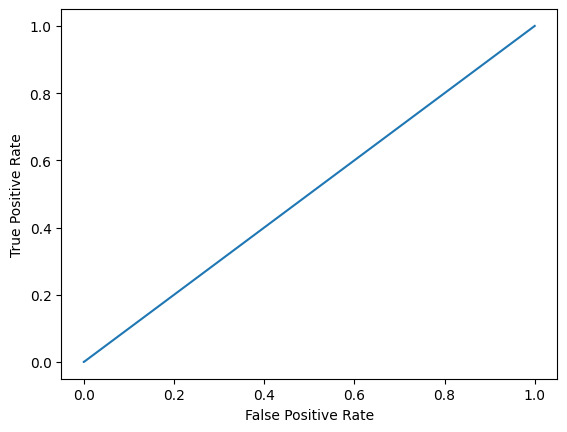

In [70]:
#Naive Bayes
nbm = GaussianNB()
nbm.fit(X_train_std,y_train)
nbm_scores = cross_val_score(nbm, X_train_std, y_train, cv=5)
nbm_mean_score = np.mean(nbm_scores)
nbm_mean_score
print("Mean Score value: ")
nbm_mean_score
nbm_pred = nbm.predict(x_val_std)
confm = confusion_matrix(y_val, nbm_pred)
confm
print(classification_report(y_val,nbm_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, nbm_pred)
fpr, tpr, thresholds = roc_curve(y_val, nbm_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNeighborsClassifier()

Mean Score value: 


0.5606094028870576

array([[5116,  123, 1086],
       [ 699,   24,  200],
       [2433,   75,  806]], dtype=int64)

              precision    recall  f1-score   support

           1       0.62      0.81      0.70      6325
           2       0.11      0.03      0.04       923
           3       0.39      0.24      0.30      3314

    accuracy                           0.56     10562
   macro avg       0.37      0.36      0.35     10562
weighted avg       0.50      0.56      0.52     10562

Accuracy Score value: 


0.5629615603105472

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

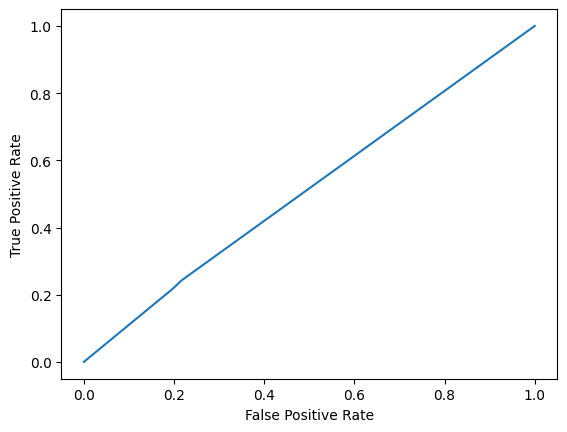

In [71]:
#KNN
knn = KNeighborsClassifier() 
knn.fit(X_train_std,y_train)
knn_scores = cross_val_score(knn, X_train_std, y_train, cv=5)
knn_mean_score = np.mean(knn_scores)
print("Mean Score value: ")
knn_mean_score
knn_pred = knn.predict(x_val_std)
confm = confusion_matrix(y_val, knn_pred)
confm
print(classification_report(y_val,knn_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, knn_pred)
fpr, tpr, thresholds = roc_curve(y_val, knn_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVC(decision_function_shape='ovo')

Mean Score value: 


0.6059118192938444

array([[6167,    0,  158],
       [ 822,    0,  101],
       [3017,    0,  297]], dtype=int64)

              precision    recall  f1-score   support

           1       0.62      0.98      0.76      6325
           2       0.00      0.00      0.00       923
           3       0.53      0.09      0.15      3314

    accuracy                           0.61     10562
   macro avg       0.38      0.35      0.30     10562
weighted avg       0.54      0.61      0.50     10562

Accuracy Score value: 


0.6120053020261315

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

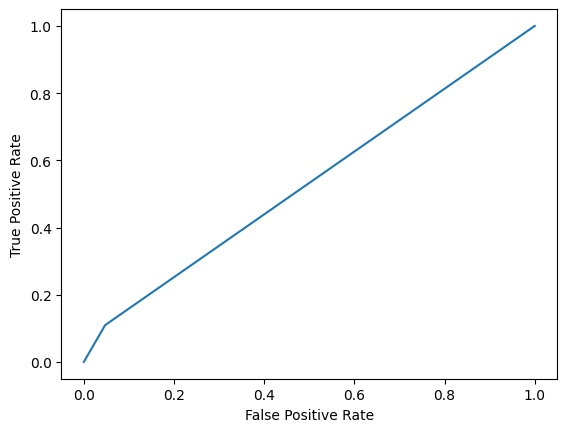

In [61]:
#SVM
svm = SVC(decision_function_shape='ovo') 
svm.fit(X_train_std,y_train)
svm_scores = cross_val_score(svm, X_train_std, y_train, cv=2)
svm_mean_score = np.mean(svm_scores)
print("Mean Score value: ")
svm_mean_score
svm_pred = svm.predict(x_val_std)
confm = confusion_matrix(y_val, svm_pred)
confm
print(classification_report(y_val,svm_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, svm_pred)
fpr, tpr, thresholds = roc_curve(y_val, svm_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RandomForestClassifier()

Mean Score value: 


0.6104967874171281

array([[5840,    1,  484],
       [ 757,    2,  164],
       [2717,    0,  597]], dtype=int64)

              precision    recall  f1-score   support

           1       0.63      0.92      0.75      6325
           2       0.67      0.00      0.00       923
           3       0.48      0.18      0.26      3314

    accuracy                           0.61     10562
   macro avg       0.59      0.37      0.34     10562
weighted avg       0.58      0.61      0.53     10562

Accuracy Score value: 


0.6096383260746071

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

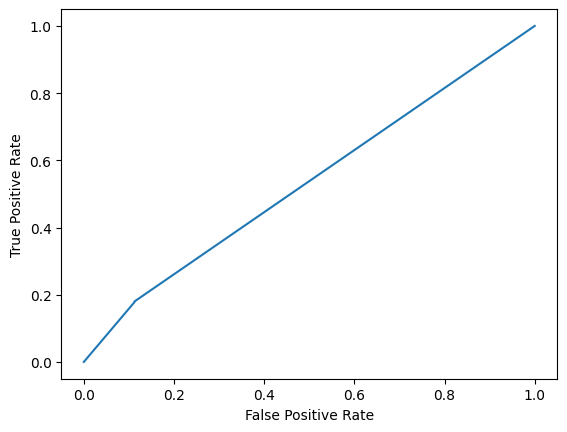

In [57]:
#Randon Forest
rfm = RandomForestClassifier() 
rfm.fit(X_train_std,y_train)
rfm_scores = cross_val_score(rfm, X_train_std, y_train, cv=5)
rfm_mean_score = np.mean(rfm_scores)
print("Mean Score value: ")
rfm_mean_score
rfm_pred = rfm.predict(x_val_std)
confm = confusion_matrix(y_val, rfm_pred)
confm
print(classification_report(y_val,rfm_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, rfm_pred)
fpr, tpr, thresholds = roc_curve(y_val, rfm_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoostingClassifier()

Mean Score value: 


0.6133371036792234

array([[5960,    2,  363],
       [ 752,    8,  163],
       [2795,    6,  513]], dtype=int64)

              precision    recall  f1-score   support

           1       0.63      0.94      0.75      6325
           2       0.50      0.01      0.02       923
           3       0.49      0.15      0.24      3314

    accuracy                           0.61     10562
   macro avg       0.54      0.37      0.34     10562
weighted avg       0.57      0.61      0.53     10562

Accuracy Score value: 


0.6136148456731679

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

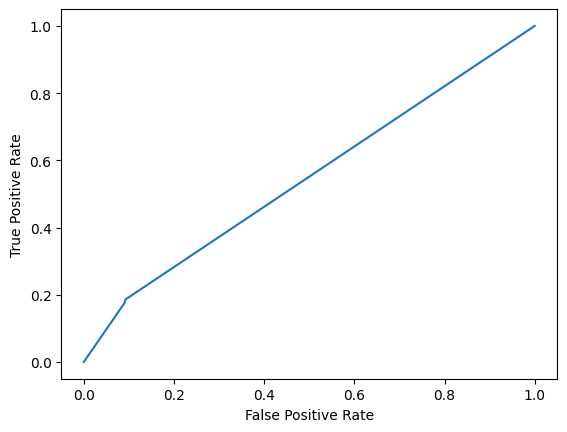

In [72]:
#Gradient Boosting
gbm = GradientBoostingClassifier() 
gbm.fit(X_train_std,y_train)
gbm_scores = cross_val_score(gbm, X_train_std, y_train, cv=5)
gbm_mean_score = np.mean(gbm_scores)
print("Mean Score value: ")
gbm_mean_score
gbm_pred = gbm.predict(x_val_std)
confm = confusion_matrix(y_val, gbm_pred)
confm
print(classification_report(y_val,gbm_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, gbm_pred)
fpr, tpr, thresholds = roc_curve(y_val, gbm_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

Mean Score value: 


0.6072305467736184

array([[6046,    1,  278],
       [ 771,    2,  150],
       [2933,    0,  381]], dtype=int64)

              precision    recall  f1-score   support

           1       0.62      0.96      0.75      6325
           2       0.67      0.00      0.00       923
           3       0.47      0.11      0.18      3314

    accuracy                           0.61     10562
   macro avg       0.59      0.36      0.31     10562
weighted avg       0.58      0.61      0.51     10562

Accuracy Score value: 


0.6086915356939974

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

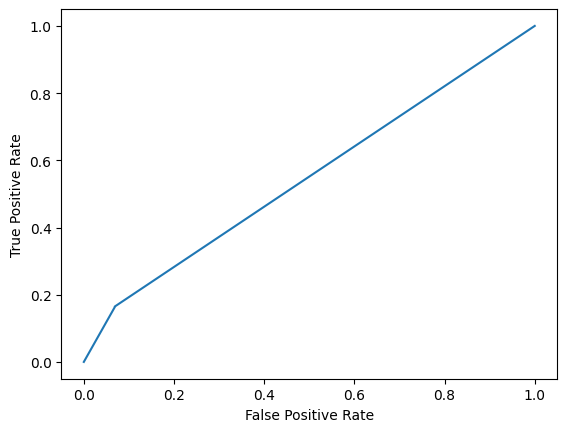

In [59]:
#AdaBoost
abc = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
abc.fit(X_train_std,y_train)
abc_scores = cross_val_score(abc, X_train_std, y_train, cv=5)
abc_mean_score = np.mean(abc_scores)
print("Mean Score value: ")
abc_mean_score
abc_pred = abc.predict(x_val_std)
confm = confusion_matrix(y_val, abc_pred)
confm
print(classification_report(y_val,abc_pred,zero_division=0.0,labels=[1, 2, 3]))
print("Accuracy Score value: ")
accuracy_score(y_val, abc_pred)
fpr, tpr, thresholds = roc_curve(y_val, abc_pred, pos_label=2)
aucValue = auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Found the biggest accuracy from the machine learning algorithms:

In [63]:
dictNames = {nbm_mean_score: "NBM", knn_mean_score: "KNN", svm_mean_score: "SVM", rfm_mean_score: "RFM", gbm_mean_score: "GBM", abc_mean_score: "ABC"}
highest = max(nbm_mean_score, knn_mean_score, svm_mean_score, rfm_mean_score, gbm_mean_score, abc_mean_score)
print("The best model is: ")
dictNames[highest]

The best model is: 


'GBM'

Tunning best model so far:

In [77]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
           'n_estimators':[100,250,500,750,1000,1250,1500,1750],
           'max_depth':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, 
                                                             subsample=1,max_features='sqrt', 
                                                             random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4, cv=2)
tuning.fit(X_train_std,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

({'mean_fit_time': array([  2.25012922,   5.5104121 ,  10.08418441,  15.04644477,
          20.04623044,  31.84482586,  61.38283253,  84.74254787,
           6.56908536,  16.4686482 ,  33.62922871,  50.72430086,
          66.2317121 ,  79.75176203,  95.11791599, 111.32109213,
           8.24896836,  20.42241418,  40.87148988,  40.83650804,
          48.73255515,  54.70056939,  88.86084425, 142.8979888 ,
          10.21547818,  24.81102133,  49.66004896,  75.9838469 ,
         100.52088213, 128.31804621, 154.51681697, 174.70646381,
          12.08731937,  29.70105851,  59.25093603,  89.51760519,
         120.98310995, 154.45531774, 185.7115916 , 215.00398636,
          14.34982371,  36.01369452,  71.79462814,  91.50764954,
          91.61190355,  68.09193432,  81.95750451,  99.60065925,
           1.74822533,   4.41272116,   8.75466096,  12.90029061,
          17.35039043,  22.77222157,  28.79705882,  33.46824288,
           2.67614186,   6.6926775 ,  13.16292751,  20.3155905 ,
        

New Model after tunning

In [35]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train_std,y_train)
pred=model1.predict(x_val_std)
predTest=model1.predict(X_test_std)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='sqrt',
                           n_estimators=1750, random_state=10, subsample=1)

Calculate metrics from the final model:

In [37]:
print("Validation data: ")
print(classification_report(y_val, pred))
print("Test data: ")
print(classification_report(y_test, predTest))

print("Accuracy Score value Val: ")
accuracy_score(y_val, pred)
print("Accuracy Score value Test: ")
accuracy_score(y_test, predTest)

Validation data: 
              precision    recall  f1-score   support

           1       0.64      0.92      0.75      6325
           2       0.46      0.01      0.03       923
           3       0.50      0.22      0.31      3314

    accuracy                           0.62     10562
   macro avg       0.54      0.38      0.36     10562
weighted avg       0.58      0.62      0.55     10562

Test data: 
              precision    recall  f1-score   support

           1       0.64      0.92      0.76      6360
           2       0.52      0.01      0.02       940
           3       0.50      0.21      0.30      3263

    accuracy                           0.62     10563
   macro avg       0.56      0.38      0.36     10563
weighted avg       0.59      0.62      0.55     10563

Accuracy Score value Val: 


0.6189168718045824

Accuracy Score value Test: 


0.6221717315156678

Feature Importance:

Feature: 0, Score: 0.00863
Feature: 1, Score: 0.03061
Feature: 2, Score: 0.10186
Feature: 3, Score: 0.03926
Feature: 4, Score: 0.03859
Feature: 5, Score: 0.05443
Feature: 6, Score: 0.02793
Feature: 7, Score: 0.05522
Feature: 8, Score: 0.04169
Feature: 9, Score: 0.03201
Feature: 10, Score: 0.07852
Feature: 11, Score: 0.03765
Feature: 12, Score: 0.03597
Feature: 13, Score: 0.03142
Feature: 14, Score: 0.04550
Feature: 15, Score: 0.01186
Feature: 16, Score: 0.00475
Feature: 17, Score: 0.00283
Feature: 18, Score: 0.00076
Feature: 19, Score: 0.00640
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01131
Feature: 22, Score: 0.00909
Feature: 23, Score: 0.00028
Feature: 24, Score: 0.00787
Feature: 25, Score: 0.00852
Feature: 26, Score: 0.00239
Feature: 27, Score: 0.00039
Feature: 28, Score: 0.00020
Feature: 29, Score: 0.00038
Feature: 30, Score: 0.01678
Feature: 31, Score: 0.00242
Feature: 32, Score: 0.00042
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00722
Fe

<BarContainer object of 140 artists>

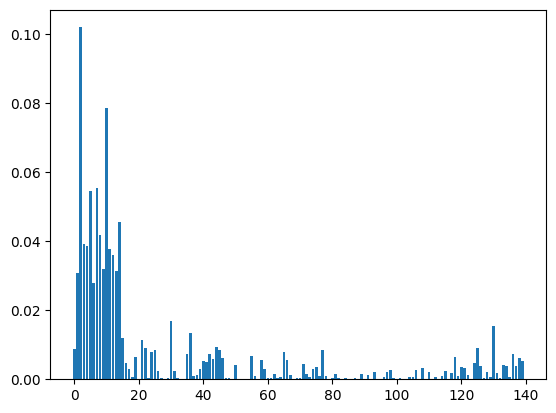

In [36]:
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Less than 20 features have more significance on the model that the rest of them, is possible to only use them to compare with a new model.

In [40]:
model2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model2.fit(X_train_std[:,:20],y_train)
pred2=model2.predict(x_val_std[:,:20])
predTest2=model2.predict(X_test_std[:,:20])

print("Validation data: ")
print(classification_report(y_val, pred2))
print("Test data: ")
print(classification_report(y_test, predTest2))

print("Accuracy Score value Val: ")
accuracy_score(y_val, pred2)
print("Accuracy Score value Test: ")
accuracy_score(y_test, predTest2)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='sqrt',
                           n_estimators=1750, random_state=10, subsample=1)

Validation data: 
              precision    recall  f1-score   support

           1       0.63      0.91      0.75      6325
           2       0.32      0.02      0.03       923
           3       0.48      0.22      0.30      3314

    accuracy                           0.61     10562
   macro avg       0.48      0.38      0.36     10562
weighted avg       0.56      0.61      0.54     10562

Test data: 
              precision    recall  f1-score   support

           1       0.64      0.92      0.75      6360
           2       0.57      0.03      0.05       940
           3       0.50      0.21      0.30      3263

    accuracy                           0.62     10563
   macro avg       0.57      0.39      0.37     10563
weighted avg       0.59      0.62      0.55     10563

Accuracy Score value Val: 


0.6117212649119484

Accuracy Score value Test: 


0.6204676701694595

The difference using only the first 20 features is small, making use of less resources for future tuning and optimization of the algorithm in the objective of better accuracy.

Deep Learning is other we can create a model for inference. <br>
Build a neural network (Simple arquitecture):

Apply one hot encoding to the target:

In [76]:

encoder
n_clases = 3
y_test_copy = to_categorical(y_test,n_clases)
y_train_copy = to_categorical(y_train,n_clases)
y_val_copy = to_categorical(y_val,n_clases)
y_test_copy
y_train_copy
y_val_copy

LabelEncoder()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Build a neural Network: <br>
Sequential Model<br>
Input Layer <br>
Four Dense Layers<br>
Output Layer<br>
Optimizer: Adam<br>
Loss: Categorical CrossEntropy<br>
Accuracy: Categorical_Accuracy<br>

In [93]:
nnModel = keras.Sequential()
nnModel.add(Input(shape=(X_train_std.shape[1],), name="digits"))
nnModel.add(layers.Dense(256, activation="relu", name="layer1"))
nnModel.add(layers.Dense(128, activation="relu", name="layer2")),
nnModel.add(layers.Dense(64, activation="relu", name="layer3")),
nnModel.add(layers.Dense(32, activation="relu", name="layer4")),
nnModel.add(Dense(y_test_copy.shape[1], activation="softmax", name="predictions"))

# Compile model
nnModel.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.categorical_crossentropy,
    # List of metrics to monitor
    metrics=[keras.metrics.categorical_accuracy],
)

nnModel.summary()


(None,)

(None,)

(None,)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 256)            │        36,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,427 (310.26 KB)

 Trainable params: 79,427 (310.26 KB)

 Non-trainable params: 0 (0.00 B)

Train the model:<br>
Batch Size: 64<br>
Epochs = 10<br>

In [94]:
# Train model
history = nnModel.fit(
    X_train_std,
    y_train_copy,
    batch_size=64,
    epochs=10,
    validation_data=(X_test_std, y_test_copy),
    verbose=2
)

Epoch 1/10
771/771 - 2s - 2ms/step - categorical_accuracy: 0.6020 - loss: 0.8708 - val_categorical_accuracy: 0.6120 - val_loss: 0.8570
Epoch 2/10
771/771 - 1s - 790us/step - categorical_accuracy: 0.6124 - loss: 0.8519 - val_categorical_accuracy: 0.6145 - val_loss: 0.8561
Epoch 3/10
771/771 - 1s - 796us/step - categorical_accuracy: 0.6135 - loss: 0.8436 - val_categorical_accuracy: 0.6129 - val_loss: 0.8519
Epoch 4/10
771/771 - 1s - 773us/step - categorical_accuracy: 0.6168 - loss: 0.8368 - val_categorical_accuracy: 0.6118 - val_loss: 0.8563
Epoch 5/10
771/771 - 1s - 793us/step - categorical_accuracy: 0.6197 - loss: 0.8293 - val_categorical_accuracy: 0.6030 - val_loss: 0.8578
Epoch 6/10
771/771 - 1s - 776us/step - categorical_accuracy: 0.6269 - loss: 0.8204 - val_categorical_accuracy: 0.6088 - val_loss: 0.8582
Epoch 7/10
771/771 - 1s - 780us/step - categorical_accuracy: 0.6296 - loss: 0.8110 - val_categorical_accuracy: 0.6117 - val_loss: 0.8610
Epoch 8/10
771/771 - 1s - 794us/step - cate

Evaluate the model  and check some predictions generate by it.

In [103]:
score = nnModel.evaluate(x_val_train, y_val_copy, verbose=0)
predictions = nnModel.predict(x_val_train)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions[1:10]
y_test_copy[20:30]

331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
Test loss: 0.8861170411109924
Test accuracy: 0.5944896936416626


array([[0.05802404, 0.6125513 , 0.3294247 ],
       [0.05327707, 0.5165914 , 0.4301315 ],
       [0.05748225, 0.56733507, 0.37518275],
       [0.16693701, 0.267547  , 0.56551594],
       [0.10432685, 0.38417795, 0.51149523],
       [0.00662728, 0.14501984, 0.84835285],
       [0.03730378, 0.6020946 , 0.3606016 ],
       [0.03173963, 0.17789385, 0.79036653],
       [0.00455795, 0.03877557, 0.9566664 ]], dtype=float32)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

We reach almost the same accuracy than using machine learning algorithms.

Possible Future Work:<br>
Tunning the algorithms (Change algorithm or include more values)<br>
Feature Selection (Check Feature Importance)<br>
Deep neural network (Tuning the neural network to get better results)<br>